(Placeholder for your group #)

(Placeholder for your names)

(Placeholder for your i-numbers)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [5]:
# A
df_x_result_cnts = df_x['result'].value_counts()
df_y_result_cnts = df_y['result'].value_counts()
df_z_result_cnts = df_z['result'].value_counts()
print('df_x result col value counts:\n',df_x_result_cnts)
print('df_y result col value counts:\n', df_y_result_cnts)
print('df_z result col value counts:\n', df_z_result_cnts)

df_x result col value counts:
 result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congress

In [28]:
print('df_x result col value counts:\n', df_x_result_cnts.to_string())


df_x result col value counts:
 result
A                                                                                                                                                                                                                                                                                                               2733
A                                                                                                                                                                                                                                                                                                               1657
B                                                                                                                                                                                                                                                                                                               1412
Answer: A                          

In [23]:
test = df_x['result'].str.strip()
print(test.value_counts())

result
A                                                                                                                 4390
B                                                                                                                 2205
C                                                                                                                 1756
D                                                                                                                 1720
Answer: A                                                                                                         1398
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who retires to take a po

### B: unexpected formats
There are 4 unexpected formats that I found: 'answer is', 'Answer:', 'None of the above', 'Not Sure'.
In addition, the expected cases A,B,C,D appear twice because of trailing/leading spaces. After counting the patterns, it seems that 'Answer:' is one of the most common ones.

In [32]:
# B
patterns = ['answer is', 'Answer:', 'None of the above', 'Not Sure']
# Count occurrences of each pattern
def print_pattern_count(df, df_name):
    pattern_counts = {pattern: df['result'].str.contains(pattern).sum() for pattern in patterns}
    for pattern, count in pattern_counts.items():
        print(f'Pattern "{pattern}" in {df_name}: {count}')
    print('-------------------')

print_pattern_count(df_x, 'df_x')
print_pattern_count(df_y, 'df_y')
print_pattern_count(df_z, 'df_z')

Pattern "answer is" in df_x: 134
Pattern "Answer:" in df_x: 3365
Pattern "None of the above" in df_x: 69
Pattern "Not Sure" in df_x: 73
-------------------
Pattern "answer is" in df_y: 130
Pattern "Answer:" in df_y: 3948
Pattern "None of the above" in df_y: 66
Pattern "Not Sure" in df_y: 86
-------------------
Pattern "answer is" in df_z: 581
Pattern "Answer:" in df_z: 2924
Pattern "None of the above" in df_z: 119
Pattern "Not Sure" in df_z: 125
-------------------


### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [31]:
#A
import copy
df_x_filtered = copy.deepcopy(df_x[df_x['result'].str.len() < 10])
df_y_filtered = copy.deepcopy(df_y[df_y['result'].str.len() < 10])
df_z_filtered = copy.deepcopy(df_z[df_z['result'].str.len() < 10])

print(df_x_filtered.shape)
print(df_y_filtered.shape)
print(df_z_filtered.shape)

(13509, 2)
(13637, 2)
(12878, 2)


In [39]:
#B
def clean_answer(s, patterns=['answer is', 'Answer:']):
    s = str(s).strip()  # Strip white spaces
    for pattern in patterns:
        s = s.replace(pattern, '')
    return s

# Clean the answers in the filtered dataframes
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)

print('Value counts filtered df_x:\n', df_x_filtered['result'].value_counts())
print('Value counts filtered df_y:\n', df_y_filtered['result'].value_counts())
print('Value counts filtered df_z:\n', df_z_filtered['result'].value_counts())

Value counts filtered df_x:
 result
A           5788
B           2965
C           2350
D           2333
Not Sure      73
Name: count, dtype: int64
Value counts filtered df_y:
 result
D           5757
C           3242
B           2519
A           2033
Not Sure      86
Name: count, dtype: int64
Value counts filtered df_z:
 result
D           3348
C           3255
B           3124
A           3026
Not Sure     125
Name: count, dtype: int64


There is still the 'Not Sure' pattern. If we need to ensure only A,B,C,D then we can get rid of the 'Not Sure' examples.

In [42]:
# Ensure only A, B, C, D answers are present
valid_answers = {'A', 'B', 'C', 'D'}
df_x_filtered = df_x_filtered[df_x_filtered['result'].isin(valid_answers)]
df_y_filtered = df_y_filtered[df_y_filtered['result'].isin(valid_answers)]
df_z_filtered = df_z_filtered[df_z_filtered['result'].isin(valid_answers)]
print('Value counts filtered df_x:\n', df_x_filtered['result'].value_counts())
print('Value counts filtered df_y:\n', df_y_filtered['result'].value_counts())
print('Value counts filtered df_z:\n', df_z_filtered['result'].value_counts())

Value counts filtered df_x:
 result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64
Value counts filtered df_y:
 result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64
Value counts filtered df_z:
 result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64


C. /Discuss:/

When comparing the sizes of the original and filtered data frames we can observe a reduction in size. df_x has lost 446 rows, df_y 427 and df_z 1170. Those correspond to reduction in size by about ~3.2%, ~3.1% and ~8.4% respectively. At this stage we need to evaluate whether the lost rows contained valuable information that might otherwise be lost - the answer is yes, since earlier we observed that a lot of the examples with length >10, contained the "answer is" pattern and they should not be lost. Additionally, removing the "Note sure" or "None of the above" patterns might also be a problem as they also carry information that might be valuable when comparing different models. For those cases we might want to consider an additional category.

In [44]:
# Compare the sizes of the original and filtered dataframes
print('Original df_x size:', df_x.shape)
print('Filtered df_x size:', df_x_filtered.shape)
print('---------------------------------')
print('Original df_y size:', df_y.shape)
print('Filtered df_y size:', df_y_filtered.shape)
print('---------------------------------')
print('Original df_z size:', df_z.shape)
print('Filtered df_z size:', df_z_filtered.shape)

Original df_x size: (13882, 2)
Filtered df_x size: (13436, 2)
---------------------------------
Original df_y size: (13978, 2)
Filtered df_y size: (13551, 2)
---------------------------------
Original df_z size: (13923, 2)
Filtered df_z size: (12753, 2)


### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [46]:
# A
df_x_joined = df_x_filtered.merge(df_test, on='question_id', how='inner')
df_y_joined = df_y_filtered.merge(df_test, on='question_id', how='inner')
df_z_joined = df_z_filtered.merge(df_test, on='question_id', how='inner')

print('df_x_joined:', df_x_joined.shape)
print('df_y_joined:', df_y_joined.shape)
print('df_z_joined:', df_z_joined.shape)

df_x_joined: (13436, 9)
df_y_joined: (13551, 9)
df_z_joined: (12753, 9)


In [47]:
display(df_x_joined.head())

,question_id,result,question,A,B,C,D,answer,subject
0,0,B,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra
1,1,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra
2,2,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra
3,3,B,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra
4,4,B,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra


In [48]:
# B

def calculate_avg_score(df):
    df['correct'] = df['result'] == df['answer']
    return df['correct'].mean()

print('Average score for model X:', calculate_avg_score(df_x_joined))
print('Average score for model Y:', calculate_avg_score(df_y_joined))
print('Average score for model Z:', calculate_avg_score(df_z_joined))

Average score for model X: 0.7674903245013397
Average score for model Y: 0.7458490148328537
Average score for model Z: 0.663294911001333


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [53]:
#A
# Get numbere of questions per subject
df_x_subject_counts = df_x_joined.groupby('subject')['question_id'].count()
df_y_subject_counts = df_y_joined.groupby('subject')['question_id'].count()
df_z_subject_counts = df_z_joined.groupby('subject')['question_id'].count()

display(df_x_subject_counts.head())

subject
abstract algebra       95
anatomy               129
astronomy             144
business ethics        98
clinical knowledge    259
Name: question_id, dtype: int64

Just wrote out the combinations for myself and wanted to confirm whether it's a 2-way relationship.

x y | 181 200 | 200 - 181 / 181 > 0.1

x z

y x | 200 181 | 181 - 200 / 200 = -0.095 | abs(-0.095) < 0.1

y z

z x

z y

In [72]:

# Combine the counts into a single dataframe
subject_counts = pd.DataFrame({
    'model_x': df_x_subject_counts,
    'model_y': df_y_subject_counts,
    'model_z': df_z_subject_counts
}).reset_index()

display(subject_counts.head())

,subject,model_x,model_y,model_z
0,abstract algebra,95,97,95
1,anatomy,129,130,125
2,astronomy,144,148,137
3,business ethics,98,96,92
4,clinical knowledge,259,261,244


In [ ]:
# Calculate the percentage difference for each subject
subject_counts['diff_x_y'] = (subject_counts['model_y'] - subject_counts['model_x']) / subject_counts['model_x']
subject_counts['diff_x_z'] = (subject_counts['model_z'] - subject_counts['model_x']) / subject_counts['model_x']

subject_counts['diff_y_x'] = (subject_counts['model_x'] - subject_counts['model_y']) / subject_counts['model_y']
subject_counts['diff_y_z'] = (subject_counts['model_z'] - subject_counts['model_y']) / subject_counts['model_y']

subject_counts['diff_z_x'] = (subject_counts['model_x'] - subject_counts['model_z']) / subject_counts['model_z']
subject_counts['diff_z_y'] = (subject_counts['model_y'] - subject_counts['model_z']) / subject_counts['model_z']

In [60]:
display(subject_counts.head())

,subject,model_x,model_y,model_z,diff_x_y,diff_x_z,diff_y_x,diff_y_z,diff_z_x,diff_z_y
0,abstract algebra,95,97,95,0.021053,0.000000,-0.020619,-0.020619,0.000000,0.021053
1,anatomy,129,130,125,0.007752,-0.031008,-0.007692,-0.038462,0.032000,0.040000
2,astronomy,144,148,137,0.027778,-0.048611,-0.027027,-0.074324,0.051095,0.080292
3,business ethics,98,96,92,-0.020408,-0.061224,0.020833,-0.041667,0.065217,0.043478
4,clinical knowledge,259,261,244,0.007722,-0.057915,-0.007663,-0.065134,0.061475,0.069672


In [66]:
# Filter subjects where we have diff_col > 0.1
filtered_subjects = subject_counts[
    (subject_counts['diff_x_y'].abs() > 0.1) |
    (subject_counts['diff_x_z'].abs() > 0.1) |
    (subject_counts['diff_y_x'].abs() > 0.1) |
    (subject_counts['diff_y_z'].abs() > 0.1) |
    (subject_counts['diff_z_x'].abs() > 0.1) |
    (subject_counts['diff_z_y'].abs() > 0.1)
]

display(filtered_subjects)
print(filtered_subjects.shape) #9 subjects

,subject,model_x,model_y,model_z,diff_x_y,diff_x_z,diff_y_x,diff_y_z,diff_z_x,diff_z_y
6,college chemistry,96,98,84,0.020833,-0.125000,-0.020408,-0.142857,0.142857,0.166667
7,college computer science,97,98,84,0.010309,-0.134021,-0.010204,-0.142857,0.154762,0.166667
11,computer security,95,98,87,0.031579,-0.084211,-0.030612,-0.112245,0.091954,0.126437
16,formal logic,109,123,113,0.128440,0.036697,-0.113821,-0.081301,-0.035398,0.088496
22,high school geography,195,193,176,-0.010256,-0.097436,0.010363,-0.088083,0.107955,0.096591
36,logical fallacies,154,136,147,-0.116883,-0.045455,0.132353,0.080882,0.047619,-0.074830
40,medical genetics,97,98,89,0.010309,-0.082474,-0.010204,-0.091837,0.089888,0.101124
42,moral disputes,329,304,250,-0.075988,-0.240122,0.082237,-0.177632,0.316000,0.216000
43,moral scenarios,737,865,774,0.173677,0.050204,-0.147977,-0.105202,-0.047804,0.117571


(9, 10)


In [65]:
print('Subjects for which there is a more than 10% difference.')
print(filtered_subjects['subject'])

Subjects for which there is a more than 10% difference.
6            college chemistry
7     college computer science
11           computer security
16                formal logic
22       high school geography
36           logical fallacies
40            medical genetics
42              moral disputes
43             moral scenarios
Name: subject, dtype: object


B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

Idea: we compute which of the 3 models has answered the fewest questions for a given subject. Then we proceed to group by subject and for each subject we can sample the min_answers number of questions for each model. This way we reduce overrepresentation by the models which have answered more questions. 

In [95]:
#Find models that has answered the least question that is our min_count
min_counts = subject_counts[['model_x', 'model_y', 'model_z']].min(axis=1)
subject_counts['min_answers'] = min_counts
#Get dict that maps subject to min_answers count
min_answers_dict = subject_counts.set_index('subject')['min_answers'].to_dict()
print(min_answers_dict)

{'abstract algebra': 95, 'anatomy': 125, 'astronomy': 137, 'business ethics': 92, 'clinical knowledge': 244, 'college biology': 131, 'college chemistry': 84, 'college computer science': 84, 'college mathematics': 93, 'college medicine': 161, 'college physics': 91, 'computer security': 87, 'conceptual physics': 212, 'econometrics': 103, 'electrical engineering': 138, 'elementary mathematics': 348, 'formal logic': 109, 'global facts': 92, 'high school biology': 277, 'high school chemistry': 185, 'high school computer science': 90, 'high school european history': 147, 'high school geography': 176, 'high school government and politics': 177, 'high school macroeconomics': 350, 'high school mathematics': 247, 'high school microeconomics': 221, 'high school physics': 136, 'high school psychology': 515, 'high school statistics': 207, 'high school us history': 192, 'high school world history': 222, 'human aging': 202, 'human sexuality': 122, 'international law': 114, 'jurisprudence': 100, 'logi

In [98]:
def rebalance_model_df(df, min_dict):
    # For each subject group in the dataframe, sample a number corresponding to the min_answers dict value
    return df.groupby('subject', group_keys=False).apply(
        lambda group: group.sample(n=int(min_dict[group.name]), random_state=27)
    )

# Rebalance each model dataframe
df_x_rebalanced = rebalance_model_df(df_x_joined, min_answers_dict)
df_y_rebalanced = rebalance_model_df(df_y_joined, min_answers_dict)
df_z_rebalanced = rebalance_model_df(df_z_joined, min_answers_dict)

# Sanity check: check the models have the same number of questions now
df_x_subject_counts_rebalanced = df_x_rebalanced.groupby('subject')['question_id'].count()
df_y_subject_counts_rebalanced = df_y_rebalanced.groupby('subject')['question_id'].count()
df_z_subject_counts_rebalanced = df_z_rebalanced.groupby('subject')['question_id'].count()

subject_counts_rebalanced = pd.DataFrame({
    'model_x': df_x_subject_counts_rebalanced,
    'model_y': df_y_subject_counts_rebalanced,
    'model_z': df_z_subject_counts_rebalanced
}).reset_index()

display(subject_counts_rebalanced.head())

,subject,model_x,model_y,model_z
0,abstract algebra,95,95,95
1,anatomy,125,125,125
2,astronomy,137,137,137
3,business ethics,92,92,92
4,clinical knowledge,244,244,244


Finally, print the updated accuracy on the rebalanced data.

In [99]:
#C
print('Average score for model X after rebalancing:', calculate_avg_score(df_x_rebalanced))
print('Average score for model Y after rebalancing:', calculate_avg_score(df_y_rebalanced))
print('Average score for model Z after rebalancing:', calculate_avg_score(df_z_rebalanced))

#check that they are not the same
print('---------------------------------')
print('Average score for model X before rebalancing:', calculate_avg_score(df_x_joined))
print('Average score for model Y before rebalancing:', calculate_avg_score(df_y_joined))
print('Average score for model Z before rebalancing:', calculate_avg_score(df_z_joined))

Average score for model X after rebalancing: 0.7672678585492636
Average score for model Y after rebalancing: 0.7471056154997243
Average score for model Z after rebalancing: 0.6632275340631645
---------------------------------
Average score for model X before rebalancing: 0.7674903245013397
Average score for model Y before rebalancing: 0.7458490148328537
Average score for model Z before rebalancing: 0.663294911001333


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [100]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [151]:
display(df_mmlu.shape)
display(df_other.shape)

(35088, 11)

(11277, 10)

In [108]:
display(df_mmlu.head())

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


In [112]:
#A
# mean acc grouped by model
mean_accuracy_mmlu = df_mmlu.groupby('model_name')['correct'].mean()
mean_accuracy_other = df_other.groupby('model_name')['correct'].mean()

# std error = std / sqrt(n)
std_error_mmlu = df_mmlu.groupby('model_name')['correct'].std() / np.sqrt(df_mmlu.groupby('model_name')['correct'].count())
std_error_other = df_other.groupby('model_name')['correct'].std() / np.sqrt(df_other.groupby('model_name')['correct'].count())

# Print the results

print("MMLU:")
for model in mean_accuracy_mmlu.index:
    print(f"Model {model} - Mean Accuracy: {mean_accuracy_mmlu[model]:.2f}, Standard Error: {std_error_mmlu[model]:4f}")

print("\nOther:")
for model in mean_accuracy_other.index:
    print(f"Model {model} - Mean Accuracy: {mean_accuracy_other[model]:.2f}, Standard Error: {std_error_other[model]:.4f}")

MMLU:
Model X - Mean Accuracy: 0.74, Standard Error: 0.004038
Model Y - Mean Accuracy: 0.76, Standard Error: 0.003941
Model Z - Mean Accuracy: 0.66, Standard Error: 0.004393

Other:
Model X - Mean Accuracy: 0.79, Standard Error: 0.0067
Model Y - Mean Accuracy: 0.72, Standard Error: 0.0073
Model Z - Mean Accuracy: 0.67, Standard Error: 0.0077


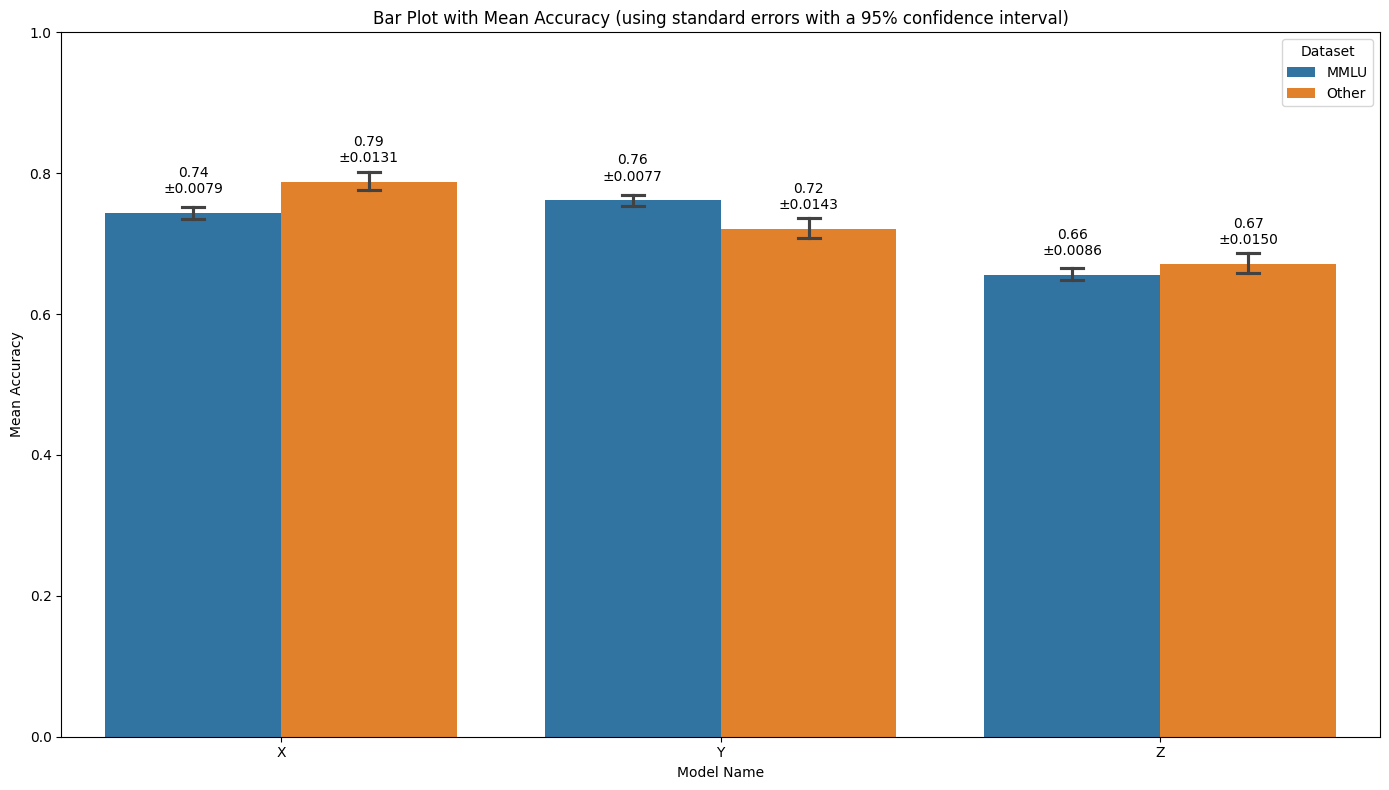

In [170]:
#B
import seaborn as sns
plt.figure(figsize=(14, 8))
data_combined = pd.concat([df_mmlu.assign(dataset='MMLU'), df_other.assign(dataset='Other')])
ax = sns.barplot(x='model_name', y='correct', hue='dataset',
                 errorbar=('ci', 95), capsize=0.1, data=data_combined)

ax.set_title("Bar Plot with Mean Accuracy (using standard errors with a 95% confidence interval)")
ax.set_xlabel('Model Name')
ax.set_ylabel('Mean Accuracy')
ax.set_ylim(0, 1)
ax.legend(title='Dataset')

# Extract the x-axis model labels (assumes 3 models: X, Y, Z)
models = [tick.get_text() for tick in ax.get_xticklabels()]
n_models = len(models)

# The labels were tough - I htought the order of labeling was: Index 0: Model X, MMLU, Index 1: Model X, Other BUT it turns out that the order is  Index 0: Model X, MMLU Index 1: Model Y, MMLU 
# Essentially, instead of going left to right, it first labels the MMLU bars and then the Other bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        if i < n_models:
            dataset = "MMLU"
            model = models[i]
        else:
            dataset = "Other"
            model = models[i - n_models]
        se = std_error_mmlu[model] if dataset == "MMLU" else std_error_other[model]
        label = f"{height:.2f}\n±{1.96 * se:.4f}" # -> 95% confidence interval
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 12),
                    textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

C. - It would seem that model Y has the highest mean accuracy on the MMLU dataset (0.76) while model X has the highest mean accuracy on the Other dataset (0.79). Given those results it is hard to declare one model better than the other. For this we might want to evaluate whether to us performance on one dataset is more critical than the other. What we can say definitively is that model Z has the lowest overall performance across the 2 datasets that we tested. What seemed odd is that the standard errors is always smaller for the MMLU dataset. Looking into the shapes of our data frames we could see -> MMLU: (35088, 11) Other: (11277, 10), therefore we have bigger sample size for the MMLU which generally leads to more precises estimates of the mean accuracy and more confidece in our results. Furthermore, from our visual inspection we can observe that standard errors with 95% confidence interval are not overlapping when comparing the perfromance of models X and Y on the 2 datasets, which implies that models X and Y, eahc perform significantly differently on the 2 datasets. 

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [166]:
#A 

# Remove duplicate questions
df_mmlu_unique = df_mmlu.drop_duplicates(subset='question_id')
df_other_unique = df_other.drop_duplicates(subset='question_id')

# We see reduction by about 1/3 as we would expect
display(df_mmlu_unique.shape)
display(df_other_unique.shape)

# See that distribution of answers is not very even (sort A,B,C,D)
distribution_mmlu = df_mmlu_unique['answer'].value_counts().sort_index()
distribution_other = df_other_unique['answer'].value_counts().sort_index()
display(distribution_mmlu)
display(distribution_other)

(11696, 11)

(3759, 10)

answer
A    1611
B    2943
C    3403
D    3739
Name: count, dtype: int64

answer
A    1078
B    1116
C     924
D     641
Name: count, dtype: int64

In [183]:
# 2D array (mmlu, other)
table = np.array([distribution_mmlu.values, distribution_other.values])
# check correct values
print(table)

# Normalize so we can also plot with normalized counts since the 2 datasets have diff num of questions
row_sums = table.sum(axis=1, keepdims=True)
# divide elems by row sums
normalized_table = table / row_sums
# verify
print(normalized_table)

[[1611 2943 3403 3739]
 [1078 1116  924  641]]
[[0.1377394  0.25162449 0.29095417 0.31968194]
 [0.2867784  0.29688747 0.24581006 0.17052408]]


In [197]:
def bar_chart_answer_distribution(table: np.array, title: str, xlabel: str = 'Correct Answer', ylabel: str = 'Frequency'):
    x = np.arange(4) 
    width = 0.35
    plt.figure(figsize=(14, 8))
    bar1 = plt.bar(x - width/2, table[0], width, label='MMLU')
    bar2 = plt.bar(x + width/2, table[1], width, label='Other')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x, ['A', 'B', 'C', 'D'])
    plt.legend(title='Dataset')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

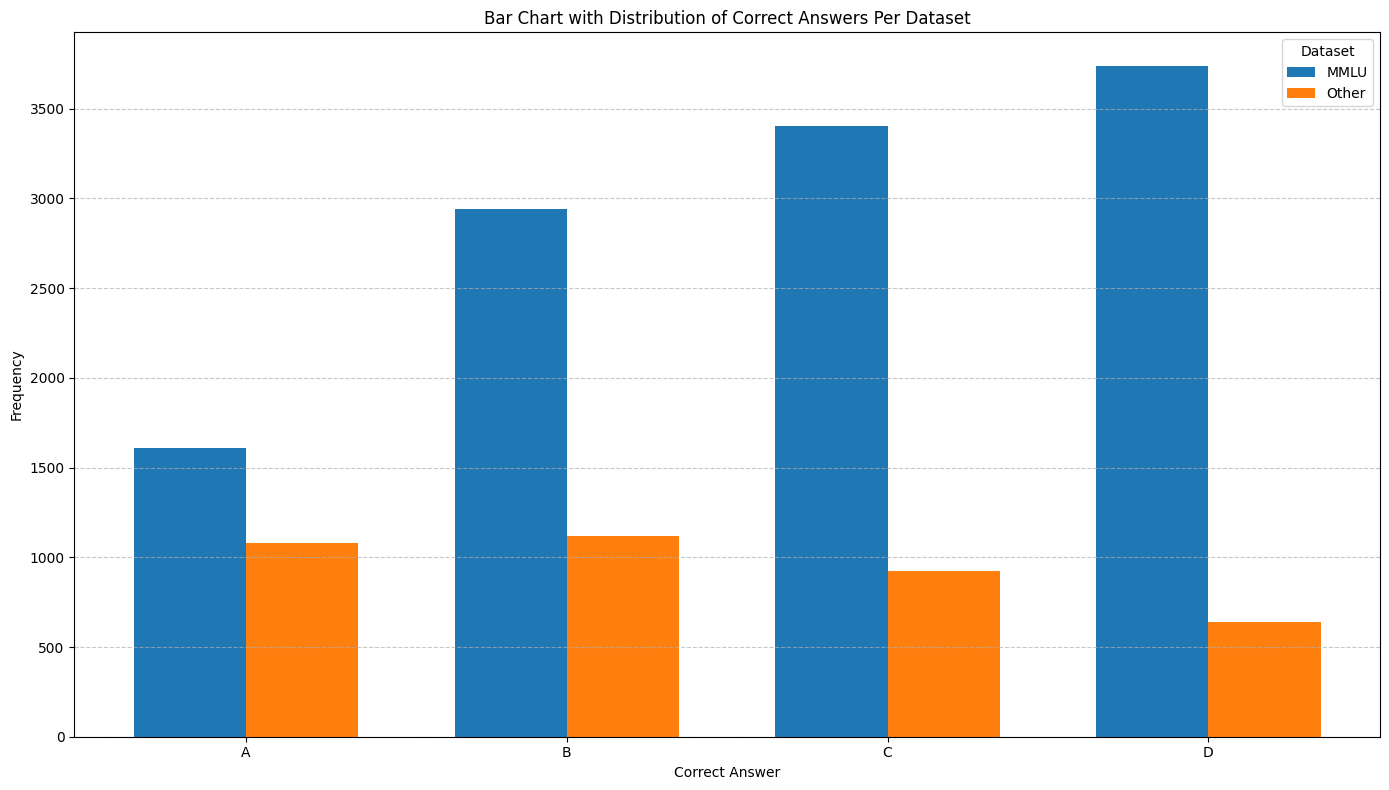

In [198]:
bar_chart_answer_distribution(table=table, title='Bar Chart with Distribution of Correct Answers Per Dataset')

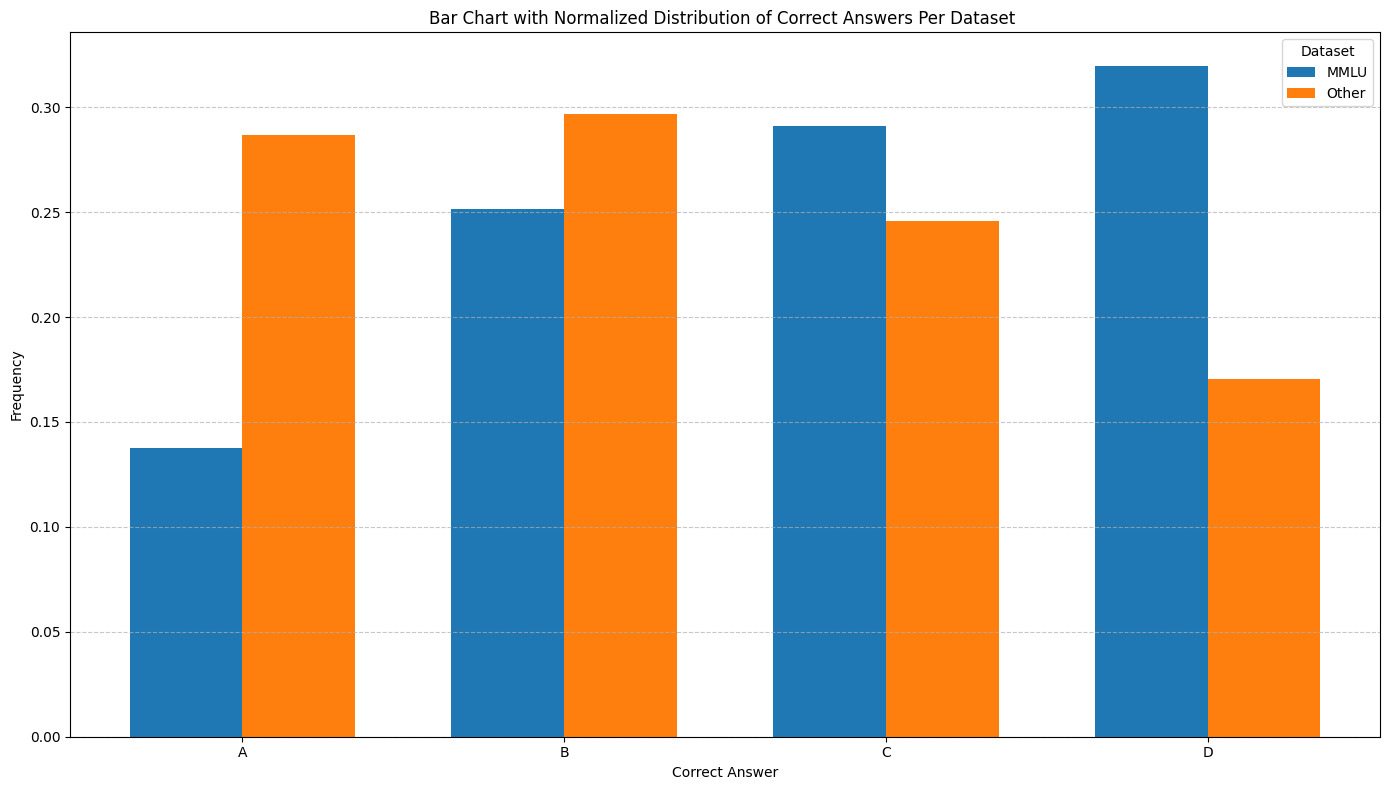

In [199]:
bar_chart_answer_distribution(normalized_table, title='Bar Chart with Normalized Distribution of Correct Answers Per Dataset ')

Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

### Null hypothsis: 
The distribution of correct answers across categories (A,B,C,D) is the same for both datasets (aka the distribution of answers is independent of the dataset).
### Alternative hypothesis:
The distribution of correct answers across categories (A,B,C,D) is dependent on the dataset.
### Result:
With p-value: 4.270849602795191e-136 < 0.05, we can reject the null hypothsis in favor of the alternative hypothesis.

In [200]:
#B
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p}")


alpha = 0.05
if p < alpha:
    conclusion = "reject"
else:
    conclusion = "fail to reject"
print(f"\nAt α = {alpha}, we {conclusion} the null hypothesis.")

Chi2 Statistic: 629.3959
p-value: 4.270849602795191e-136

At α = 0.05, we reject the null hypothesis.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

LM X Mean Accuracy by Answer Option (MMLU):
[0.97268777 0.79918451 0.70790479 0.63359187]

LM X Mean Accuracy by Answer Option (Other):
[0.97402597 0.80645161 0.67640693 0.60374415]


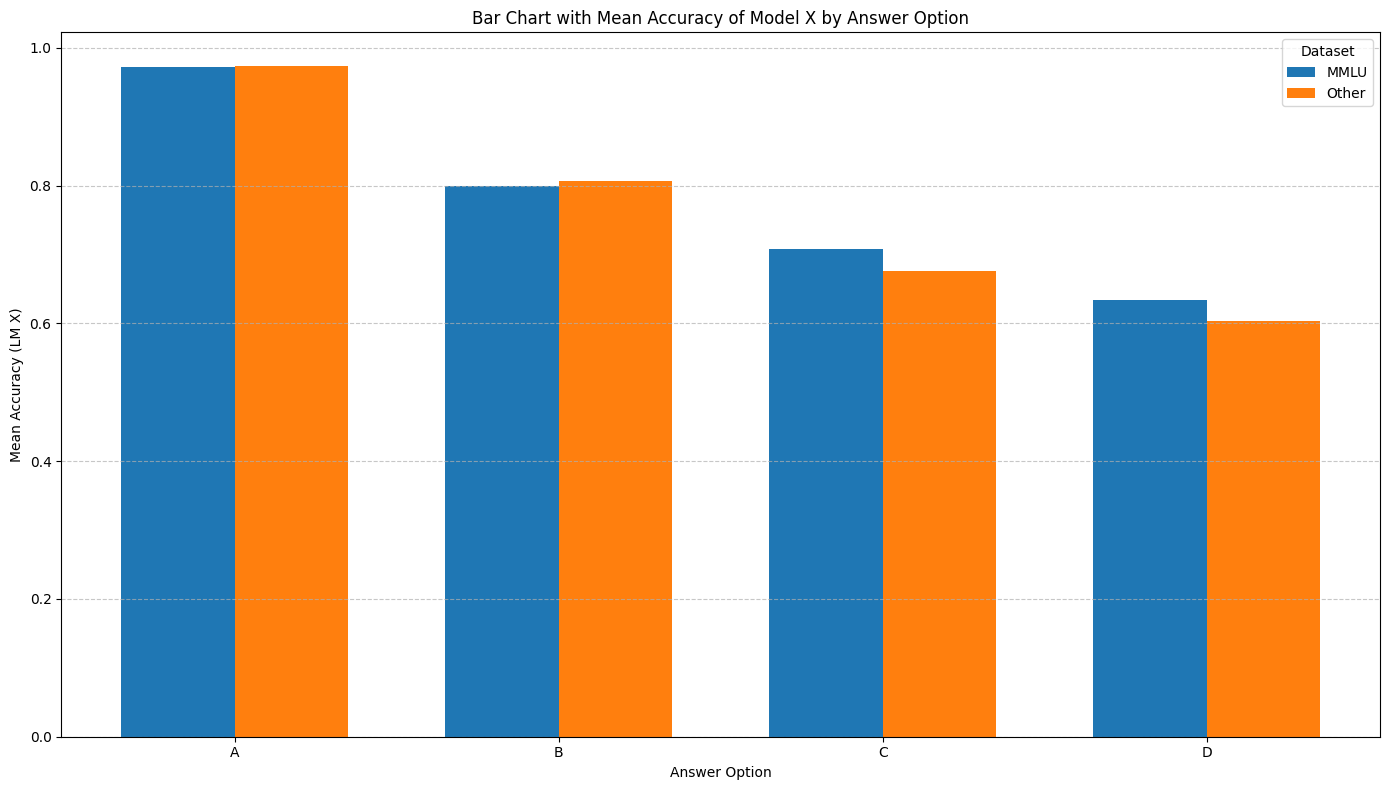

In [203]:
#A
# Get model X | Rem: model x has best performance on other and good preform on MMLU
# Other most freq. answers A,B, least D
# MMLU most freq. answers C,D, least A
df_mmlu_X = df_mmlu[df_mmlu['model_name'] == 'X']
df_other_X = df_other[df_other['model_name'] == 'X']

answers = ['A', 'B', 'C', 'D']
grouped_mmlu = df_mmlu_X.groupby('answer')['correct'].mean().reindex(answers)
grouped_other = df_other_X.groupby('answer')['correct'].mean().reindex(answers)

grouped_mmlu_array = np.array(grouped_mmlu)
grouped_other_array = np.array(grouped_other)

print("LM X Mean Accuracy by Answer Option (MMLU):")
print(grouped_mmlu_array)
print("\nLM X Mean Accuracy by Answer Option (Other):")
print(grouped_other_array)

bar_chart_answer_distribution(np.array([grouped_mmlu_array, grouped_other_array]), title='Bar Chart with Mean Accuracy of Model X by Answer Option', xlabel='Answer Option', ylabel='Mean Accuracy (LM X)')


 Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

Note: I thought that we use t-test mostly for continuous data nad not binary like correct or not.
 ### Null hypothesis: LM X’s mean accuracy for questions with correct answer "A" is the same across the two datasets.
 
 ### Alternative hypothesis: The mean accuracy of LM X on questions with correct answer "A" is different between the two datasets

 ### Conclusion: With p-value: 0.8324 > 0.05 we fail to reject the null hypothesis
*This makes sense as can be observed from the graph above


In [213]:
#B
sample_mmlu_A = df_mmlu_X[df_mmlu_X['answer'] == 'A']['correct']
sample_other_A = df_other_X[df_other_X['answer'] == 'A']['correct']

t_stat_A, p_value_A = ttest_ind(sample_mmlu_A, sample_other_A, equal_var=False)

print(f"t-statistic: {t_stat_A:.4f}\np-value: {p_value_A:.4f}")

alpha = 0.05
if p_value_A < alpha:
    conclusion = "reject"
else:
    conclusion = "fail to reject"
print(f"\nAt α = {alpha}, we {conclusion} the null hypothesis.")


t-statistic: -0.2116
p-value: 0.8324

At α = 0.05, we fail to reject the null hypothesis.


In [208]:
display(sample_mmlu_A.value_counts())
display(sample_other_A.value_counts())

correct
True     1567
False      44
Name: count, dtype: int64

correct
True     1050
False      28
Name: count, dtype: int64

Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

### Null hypothesis: LM X’s mean accuracy for questions with correct answer "A" is the same as questions with correct answer "C" or "D" for the selected dataset.
 
### Alternative hypothesis: The mean accuracy of LM X on questions with correct answer "A" is different compared to questions with correct answer "C" or "D" given the selected dataset.

### Conclusion: With p-values < 0.05 we reject the null hypothesis in favor of the alternative hypothesis for both datasets. 
We confirm this by observing the plot, which clearly indicates that model X performs worse on options C or D compoared to option A. This might indicate that the model is biased towards answering A, thus achieving a higher score there. 

In [218]:
#C
def A_CD_compare(df, dataset_name):
    sample_A = df[df['answer'] == 'A']['correct']
    sample_CD = df[df['answer'].isin(['C','D'])]['correct']
    t_stat, p_value = ttest_ind(sample_A, sample_CD, equal_var=False)
    print(f"\nDataset: {dataset_name}")
    print(f"t-statistic: {t_stat:.4f}\np-value: {p_value}")
    alpha = 0.05
    if p_value < alpha:
        conclusion = "reject"
    else:
        conclusion = "fail to reject"
    print(f"At α = {alpha}, we {conclusion} the null hypothesis.")

A_CD_compare(df_mmlu_X, "MMLU")
A_CD_compare(df_other_X, "Other")


Dataset: MMLU
t-statistic: 44.0588
p-value: 0.0
At α = 0.05, we reject the null hypothesis.

Dataset: Other
t-statistic: 25.1395
p-value: 1.1880049447651482e-121
At α = 0.05, we reject the null hypothesis.


### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [222]:
#A
mmlu_answer_means = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean()
print("MMLU - Mean Accuracies Conditioned on the Correct Answer:")
print(mmlu_answer_means.unstack())

other_cond_means = df_other.groupby(['model_name', 'answer'])['correct'].mean()
print("\nOther - Mean Accuracies Conditioned on the Correct Answer:")
print(other_cond_means.unstack())

MMLU - Mean Accuracies Conditioned on the Correct Answer:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139

Other - Mean Accuracies Conditioned on the Correct Answer:
answer             A         B         C         D
model_name                                        
X           0.974026  0.806452  0.676407  0.603744
Y           0.625232  0.663978  0.762987  0.920437
Z           0.680891  0.667563  0.662338  0.677067


B. /Discuss:/

It seems that model X shows very high accuracy when the correct answer is A in both datasets, followd by B and noticably lower accuracies when the correct answer is C or d

On the other hand, model Y is doing the inverse of X, meaning that we observe relatively low performance when the correct answer is A or B but high accuracies for C and D. 

Lastly, model Z shows somewhat uniform performance across all answer options meaning that we have the same accuracy regardless of which the correct answer is, which is good. However, we also observe a lower performance in general compared to the otehr models.

Additionally, since we see similar mean accuracy scores across both datasets we can say that those difference between the 2 models are due to how the models were trained and developed rather than the characteristics of the dataset that they were trained on.

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

When I first observed the mean accuracy for answer A in model X, which was about 0.97, I thought that we might have data leakage and the model was biased toward answering A based on the distribution of correct answers. By permuting the position of the correct answer we can check whether our model is biased towards giving a specific answer. This way we essentially check if the model is understanding and answering the questions or relying on the distribution of correct answers. Our expectation is that a robust model should maintain the same performance regardless of the of the position of hte correct answer.

In [225]:
df_mmlu_shuffle = pd.read_csv('data/task_2_5/lm_scores_mmlu_shuffle.csv')
mmlu_answer_means_shuffle = df_mmlu_shuffle.groupby(['model_name', 'answer'])['correct'].mean()
print("MMLU - Mean Accuracies Conditioned on the Correct Answer For the Shuffled Answer Dataset:")
print(mmlu_answer_means_shuffle.unstack())

mmlu_answer_means = df_mmlu.groupby(['model_name', 'answer'])['correct'].mean()
print("MMLU - Mean Accuracies Conditioned on the Correct Answer:")
print(mmlu_answer_means.unstack())

MMLU - Mean Accuracies Conditioned on the Correct Answer For the Shuffled Answer Dataset:
answer             A         B         C         D
model_name                                        
X           0.968496  0.804838  0.704530  0.644172
Y           0.643293  0.677346  0.741249  0.911945
Z           0.665989  0.667865  0.668840  0.661133
MMLU - Mean Accuracies Conditioned on the Correct Answer:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139


B. /Discuss:/ Here we can observe that the mean accuracy for A remains high in both the original and shuffled datasets. Similalry, all models have similar perfromance between the 2 datasets indicating that they are not biased towards a specific answer position. If we wanted a stronger confirmation we could perform a statistical test to validate this observation.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [231]:
display(df_mmlu.shape)
display(df_mmlu_shuffle.shape)
# Merge dataframes on question_id and model_name
df_merged = pd.merge(df_mmlu, df_mmlu_shuffle, on=["question_id", "model_name"], suffixes=("_orig", "_shuf"))
# Check that merge actually makes sense
display(df_merged.head())

(35088, 11)

(35088, 11)

,result_orig,question_id,question_orig,A_orig,B_orig,C_orig,D_orig,answer_orig,subject_orig,correct_orig,model_name,result_shuf,question_shuf,A_shuf,B_shuf,C_shuf,D_shuf,answer_shuf,subject_shuf,correct_shuf
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X,A,Find the degree for the given field extension ...,4,0,2,6,A,abstract algebra,True
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X,C,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X,D,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X,C,Statement 1 | A factor group of a non-Abelian ...,"True, True","True, False","False, False","False, True",C,abstract algebra,True
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X,D,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True


   Original Accuracy  Test-Retest Metric
X           0.743588            0.588406
Y           0.761542            0.571648
Z           0.655951            0.441604


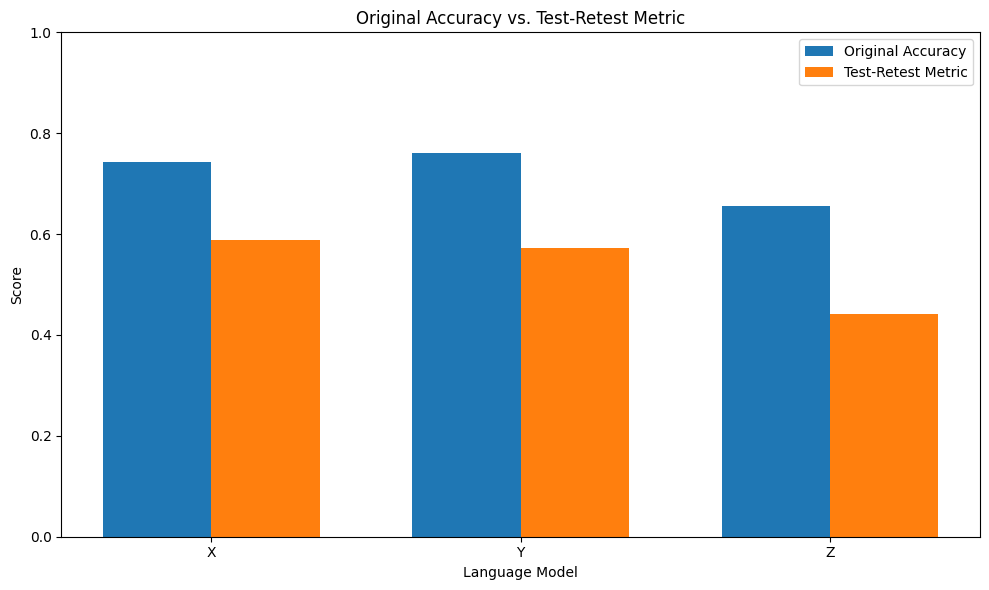

In [236]:
#fancy code

# Compute metrics for each language model
lms = ['X', 'Y', 'Z']
results = {}

for lm in lms:
    df_lm = df_merged[df_merged["model_name"] == lm]
    original_acc = df_lm["correct_orig"].mean()
    #The formula looked scary but once I figured M = 1 since we have 1 shuffle, it was easy to see 
    # that we just take the mean of the product of the two columns that tell us how the model answered in both original and shuffled datasets
    test_retest = (df_lm["correct_orig"] * df_lm["correct_shuf"]).mean()
    results[lm] = {"Original Accuracy": original_acc, "Test-Retest Metric": test_retest}

results_df = pd.DataFrame(results).T
print(results_df)

# Plotting
labels = results_df.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, results_df["Original Accuracy"], width, label="Original Accuracy")
ax.bar(x + width/2, results_df["Test-Retest Metric"], width, label="Test-Retest Metric")

ax.set_xlabel("Language Model")
ax.set_ylabel("Score")
ax.set_title("Original Accuracy vs. Test-Retest Metric")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [250]:
#A
for model in ['X', 'Y', 'Z']:
    print(f"Model {model}:")
    
    # Filter for current model
    df_model = df_mmlu[df_mmlu['model_name'] == model]
    
    # 1. Distribution of answers given
    print("\nDistribution of answers given:")
    answer_dist = df_model['result'].value_counts().sort_index()
    print(answer_dist)
    
    # 2. Accuracy conditioned on answer given
    print("\nAccuracy when giving each answer:")
    conditional_acc = df_model.groupby('result')['correct'].mean()
    print(conditional_acc)
    
    print("----------------------")

Model X:

Distribution of answers given:
result
A    4259
B    2659
C    2409
D    2369
Name: count, dtype: int64

Accuracy when giving each answer:
result
A    0.367927
B    0.884543
C    1.000000
D    1.000000
Name: correct, dtype: float64
----------------------
Model Y:

Distribution of answers given:
result
A    1072
B    2256
C    3015
D    5353
Name: count, dtype: int64

Accuracy when giving each answer:
result
A    0.937500
B    0.897606
C    0.827861
D    0.631608
Name: correct, dtype: float64
----------------------
Model Z:

Distribution of answers given:
result
A    2176
B    2885
C    3237
D    3398
Name: count, dtype: int64

Accuracy when giving each answer:
result
A    0.476103
B    0.654073
C    0.703429
D    0.727487
Name: correct, dtype: float64
----------------------


B. /Discuss:/

We can see that for model X the most frequent answer is A (4260 times) but the accuracy is only ~37%. In contrast, we have perfect accuracy when answering  C or D and a high accuracy when answering B (~88%). Mt guess is that the model simply picks A when it's not sure as it's performance for B,C & D is almost perfect.

For model Y we see that D is most frequently picked (5353 times). Similarly, the performance when answering D is lower (~63%). The accuracy for A,B or C is rather high - consistently over 80%. This might suggest that Y employs a similar strategy to A with slightly more risk taking. For example it can pick an otpions when it is 90% certain and if not such option is found then it defaults to D.

The answer distriubution for Z seems the most balanced out of the 3. The accuracy seems to improve the more answers this gives going from A (2176 with ~48% acc) to D (3398 with ~73% acc). This model might simply choose the option that has the highest probability of being correct.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [251]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

installing tiktoken package



[notice] A new release of pip is available: 23.3.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/883.8 kB ? eta -:--:--
   - -------------------------------------- 30.7/883.8 kB 1.3 MB/s eta 0:00:01
   -- ------------------------------------ 61.4/883.8 kB 656.4 kB/s eta 0:00:02
   ---- --------------------------------- 112.6/883.8 kB 939.4 kB/s eta 0:00:01
   ------- -------------------------------- 174.1/883.8 kB 1.1 MB/s eta 0:00:01
   --------- ------------------------------ 204.8/883.8 kB 1.0 MB/s eta 0:00:01
   ----------- ---------------------------- 256.0/883.8 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 317.4/883.8 kB 1.0 MB/s eta 0:00:01
   ---------------- ----------------------- 368.6/883.8 kB 1.0 MB/s eta 0:00:01
   ------------------- -------------------- 419.8/883.8 kB

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

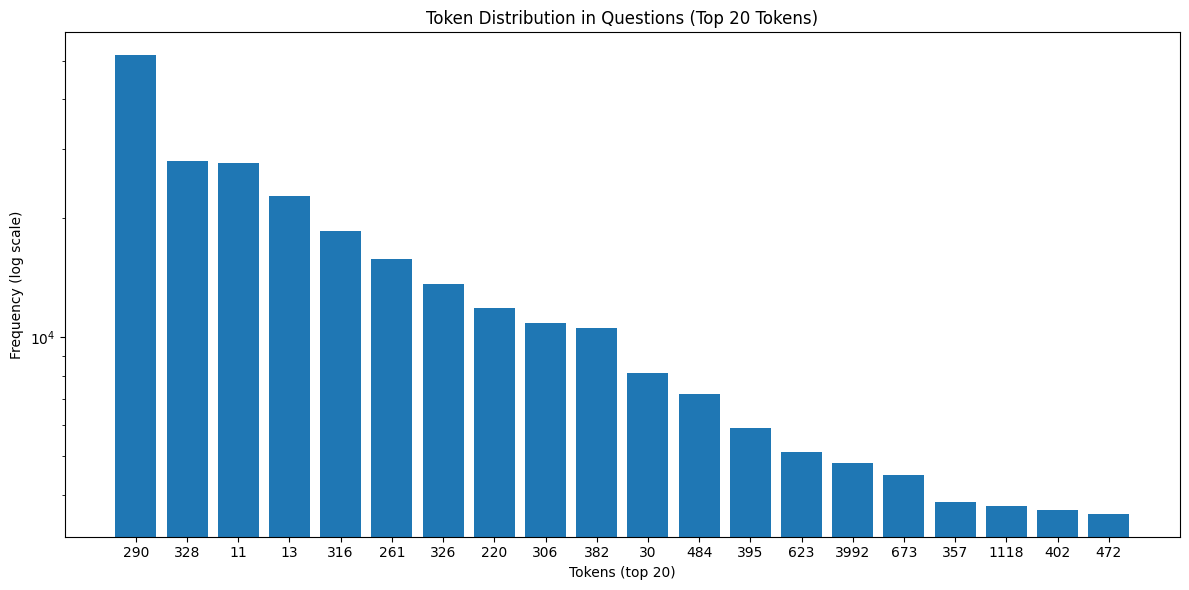

In [267]:
#A
from collections import Counter

df = pd.read_csv("data/task_1/mmlu_data/test.csv")
question_tokens = []
for q in df['question'].dropna():
    question_tokens.extend(tokenize_text(q))

# Count frequencies
q_counter = Counter(question_tokens)

# Curoff 20
top_q = q_counter.most_common(20)
tokens_top, freq_top = zip(*top_q)

plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens_top)), freq_top)
plt.xlabel("Tokens (top 20)")
plt.ylabel("Frequency (log scale)")
# Log scale
plt.yscale('log')
plt.title("Token Distribution in Questions (Top 20 Tokens)")
plt.xticks(range(len(tokens_top)), tokens_top)
plt.tight_layout()
plt.show()

Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

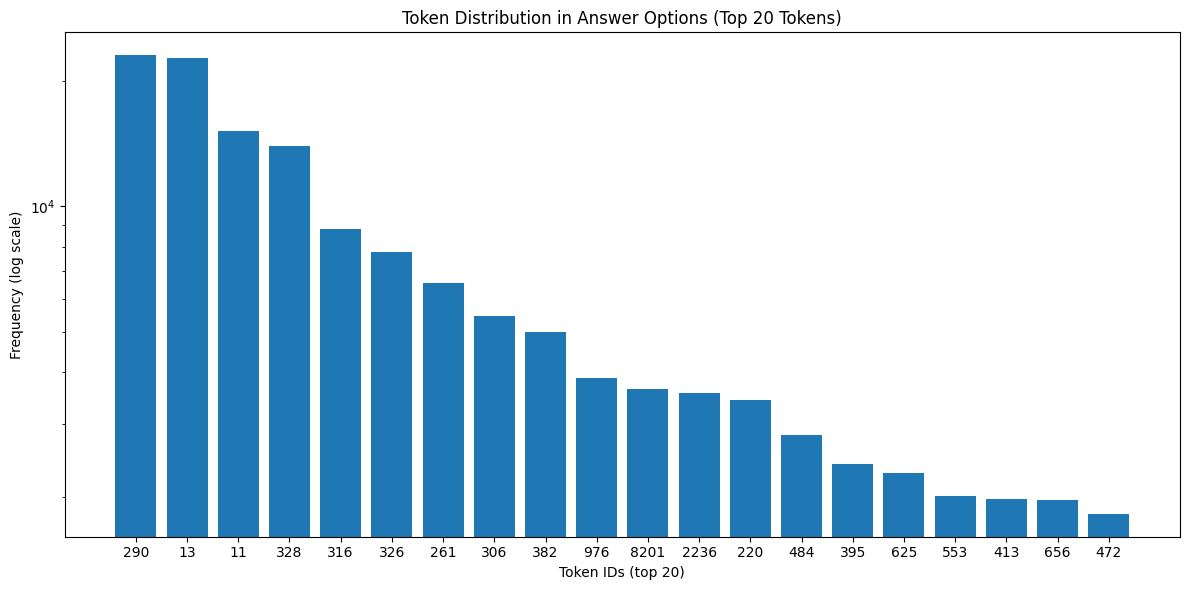

In [266]:
#B
answer_tokens = []
# Combine all answers from the four columns
for col in ['A', 'B', 'C', 'D']:
    for ans in df[col]:
        answer_tokens.extend(tokenize_text(ans))

a_counter = Counter(answer_tokens)
top_a = a_counter.most_common(20)
tokens_top_a, freq_top_a = zip(*top_a)

plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens_top_a)), freq_top_a)
plt.xlabel("Token IDs (top 20)")
plt.ylabel("Frequency (log scale)")
plt.yscale('log')
plt.title("Token Distribution in Answer Options (Top 20 Tokens)")
plt.xticks(range(len(tokens_top_a)), tokens_top_a)
plt.tight_layout()
plt.show()

 Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

In [283]:
#C
# We first tokenize each of the strings "A", "B", "C", and "D".
letters = ['A', 'B', 'C', 'D']
letter_tokens = {}
for l in letters:
    token_id = tokenize_text(l)
    print(f"Token for letter '{l}': {token_id}")
    letter_tokens[l] = token_id[0]

# Combine all tokens from questions and answers into one list.
all_tokens = question_tokens + answer_tokens

all_counter = Counter(all_tokens)
letter_counts = {}
for l in letters:
    token = letter_tokens[l] # get token for letter
    count = all_counter[token] # get count for letter
    letter_counts[l] = count # add count to letter_counts

print("\nLetter counts:")
display(letter_counts)
# Compute relative distribution - individual_count / sum_total
total = sum(letter_counts.values())
rel_distribution = {l: letter_counts[l] / total for l in letters}
print("Relative distribution:")
display(rel_distribution)

Token for letter 'A': [32]
Token for letter 'B': [33]
Token for letter 'C': [34]
Token for letter 'D': [35]

Letter counts:


{'A': 3314, 'B': 252, 'C': 425, 'D': 195}

Relative distribution:


{'A': 0.7916865742952699,
 'B': 0.06020066889632107,
 'C': 0.10152890587673197,
 'D': 0.046583850931677016}

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [323]:
df = pd.read_csv("data/task_1/mmlu_data/test.csv")

def count_tokens_per_row(row):
    # Combine question and answer options
    combined = " ".join([
        str(row['question']),
        str(row['A']),
        str(row['B']),
        str(row['C']),
        str(row['D'])
    ])
    
    # Tokenize
    tokens = tokenize_text(combined)
    token_counter = Counter(tokens)
    
    # Extract counts for each letter token using letter tokens from earlier
    counts = {f"{letter}_count": token_counter.get(letter_tokens[letter], 0)
              for letter in letters}
    
    counts["total_tokens"] = len(tokens)
    return pd.Series(counts)

# Apply to all rows
token_counts = df.apply(count_tokens_per_row, axis=1)

# Merge counts with original data and remove duplicate columns
df_combined = pd.concat([df, token_counts], axis=1)

# Group by the correct answer and compute means
grouped_results = df_combined.groupby('answer')[[
    'A_count', 'B_count', 'C_count', 'D_count', 'total_tokens'
]].mean()

print(grouped_results.round(3))

        A_count  B_count  C_count  D_count  total_tokens
answer                                                  
A         0.157    0.007    0.013    0.004        92.820
B         0.167    0.011    0.011    0.005        88.619
C         0.158    0.010    0.016    0.005        92.449
D         0.166    0.005    0.017    0.005        91.854


B. /Discuss:/  What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?

we see that regardless of which answer is correct token A occurs most often and somewhat consistently. On the other hand, we see that the occurent of the D token is the most rare. The hypothesis that the frequency of A,B,C and D migth influence results might not hold since the general frequency of tokens is rather low compared to the average total_tokens that we observe. 

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [16]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.